In [40]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools 
import gc
import os
import sys
%matplotlib inline

In [41]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df


In [42]:
cab_data = pd.read_csv("cab_rides.csv")
cab_data = reduce_mem_usage(cab_data)
weather_data = pd.read_csv("weather.csv")
weather_data = reduce_mem_usage(weather_data)

Memory usage of dataframe is 52.88 MB
Memory usage after optimization is: 40.49 MB
Decreased by 23.4%
Memory usage of dataframe is 0.38 MB
Memory usage after optimization is: 0.10 MB
Decreased by 73.3%


In [43]:
cab_data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.439941,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.439941,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.439941,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.439941,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.439941,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.000000,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.000000,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.000000,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.000000,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [44]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [45]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [46]:
import datetime
cab_data['datetime'] = pd.to_datetime(cab_data['time_stamp'])
cab_data
weather_data['date_time'] = pd.to_datetime(weather_data['time_stamp'])

In [47]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime'],
      dtype='object')

In [48]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind', 'date_time'],
      dtype='object')

In [49]:
cab_data.shape

(693071, 11)

In [50]:
weather_data.shape

(6276, 9)

In [51]:
cab_data.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.0,693071.0
mean,NaN,1.544046e+12,NaN,NaN
std,0.000000,6.891925e+08,0.0,0.0
min,0.020004,1.543204e+12,2.5,1.0
25%,1.280273,1.543444e+12,9.0,1.0
50%,2.160156,1.543737e+12,13.5,1.0
75%,2.919922,1.544828e+12,22.5,1.0
max,7.859375,1.545161e+12,97.5,3.0


In [52]:
weather_data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,inf,0.677734,inf,0.057648,1.543857e+09,0.764160,6.800781
std,6.019531,0.314453,12.875,0.100769,6.659340e+05,0.127319,3.632812
min,19.625000,0.000000,988.000,0.000200,1.543204e+09,0.449951,0.290039
25%,36.085938,0.439941,997.875,0.004902,1.543387e+09,0.669922,3.517090
50%,40.125000,0.779785,1007.500,0.014847,1.543514e+09,0.759766,6.570312
75%,42.843750,0.970215,1018.500,0.060913,1.544691e+09,0.890137,9.921875
max,55.406250,1.000000,1035.000,0.780762,1.545159e+09,0.990234,18.187500


In [53]:
a = pd.concat([cab_data,weather_data])

In [54]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time
0,0.439941,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,0.439941,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,0.439941,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,0.439941,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,0.439941,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [55]:
a['day'] = a.date_time.dt.day
a['hour'] = a.date_time.dt.hour

In [56]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
0,0.439941,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,0.439941,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,0.439941,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,0.439941,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4,0.439941,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [57]:
a.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
6271,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.71875,North Station,0.890137,1000.5,NaN,0.959961,1.519531,1970-01-01 00:00:01.543819974,1.0,0.0
6272,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.84375,Northeastern University,0.879883,1000.5,NaN,0.959961,1.540039,1970-01-01 00:00:01.543819974,1.0,0.0
6273,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.81250,South Station,0.890137,1000.5,NaN,0.959961,1.540039,1970-01-01 00:00:01.543819974,1.0,0.0
6274,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.78125,Theatre District,0.890137,1000.5,NaN,0.959961,1.540039,1970-01-01 00:00:01.543819974,1.0,0.0
6275,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.68750,West End,0.890137,1000.5,NaN,0.959961,1.519531,1970-01-01 00:00:01.543819974,1.0,0.0


In [58]:
a.fillna(0,inplace=True)

In [59]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
0,0.439941,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1,0.439941,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,0.439941,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,0.439941,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,0.439941,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [60]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'date_time', 'day', 'hour'],
      dtype='object')

In [61]:
a.groupby('cab_type').count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
cab_type,,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


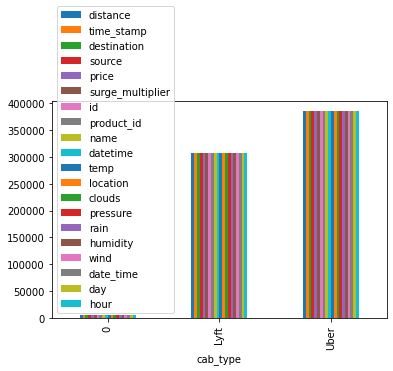

In [62]:
a.groupby('cab_type').count().plot.bar()

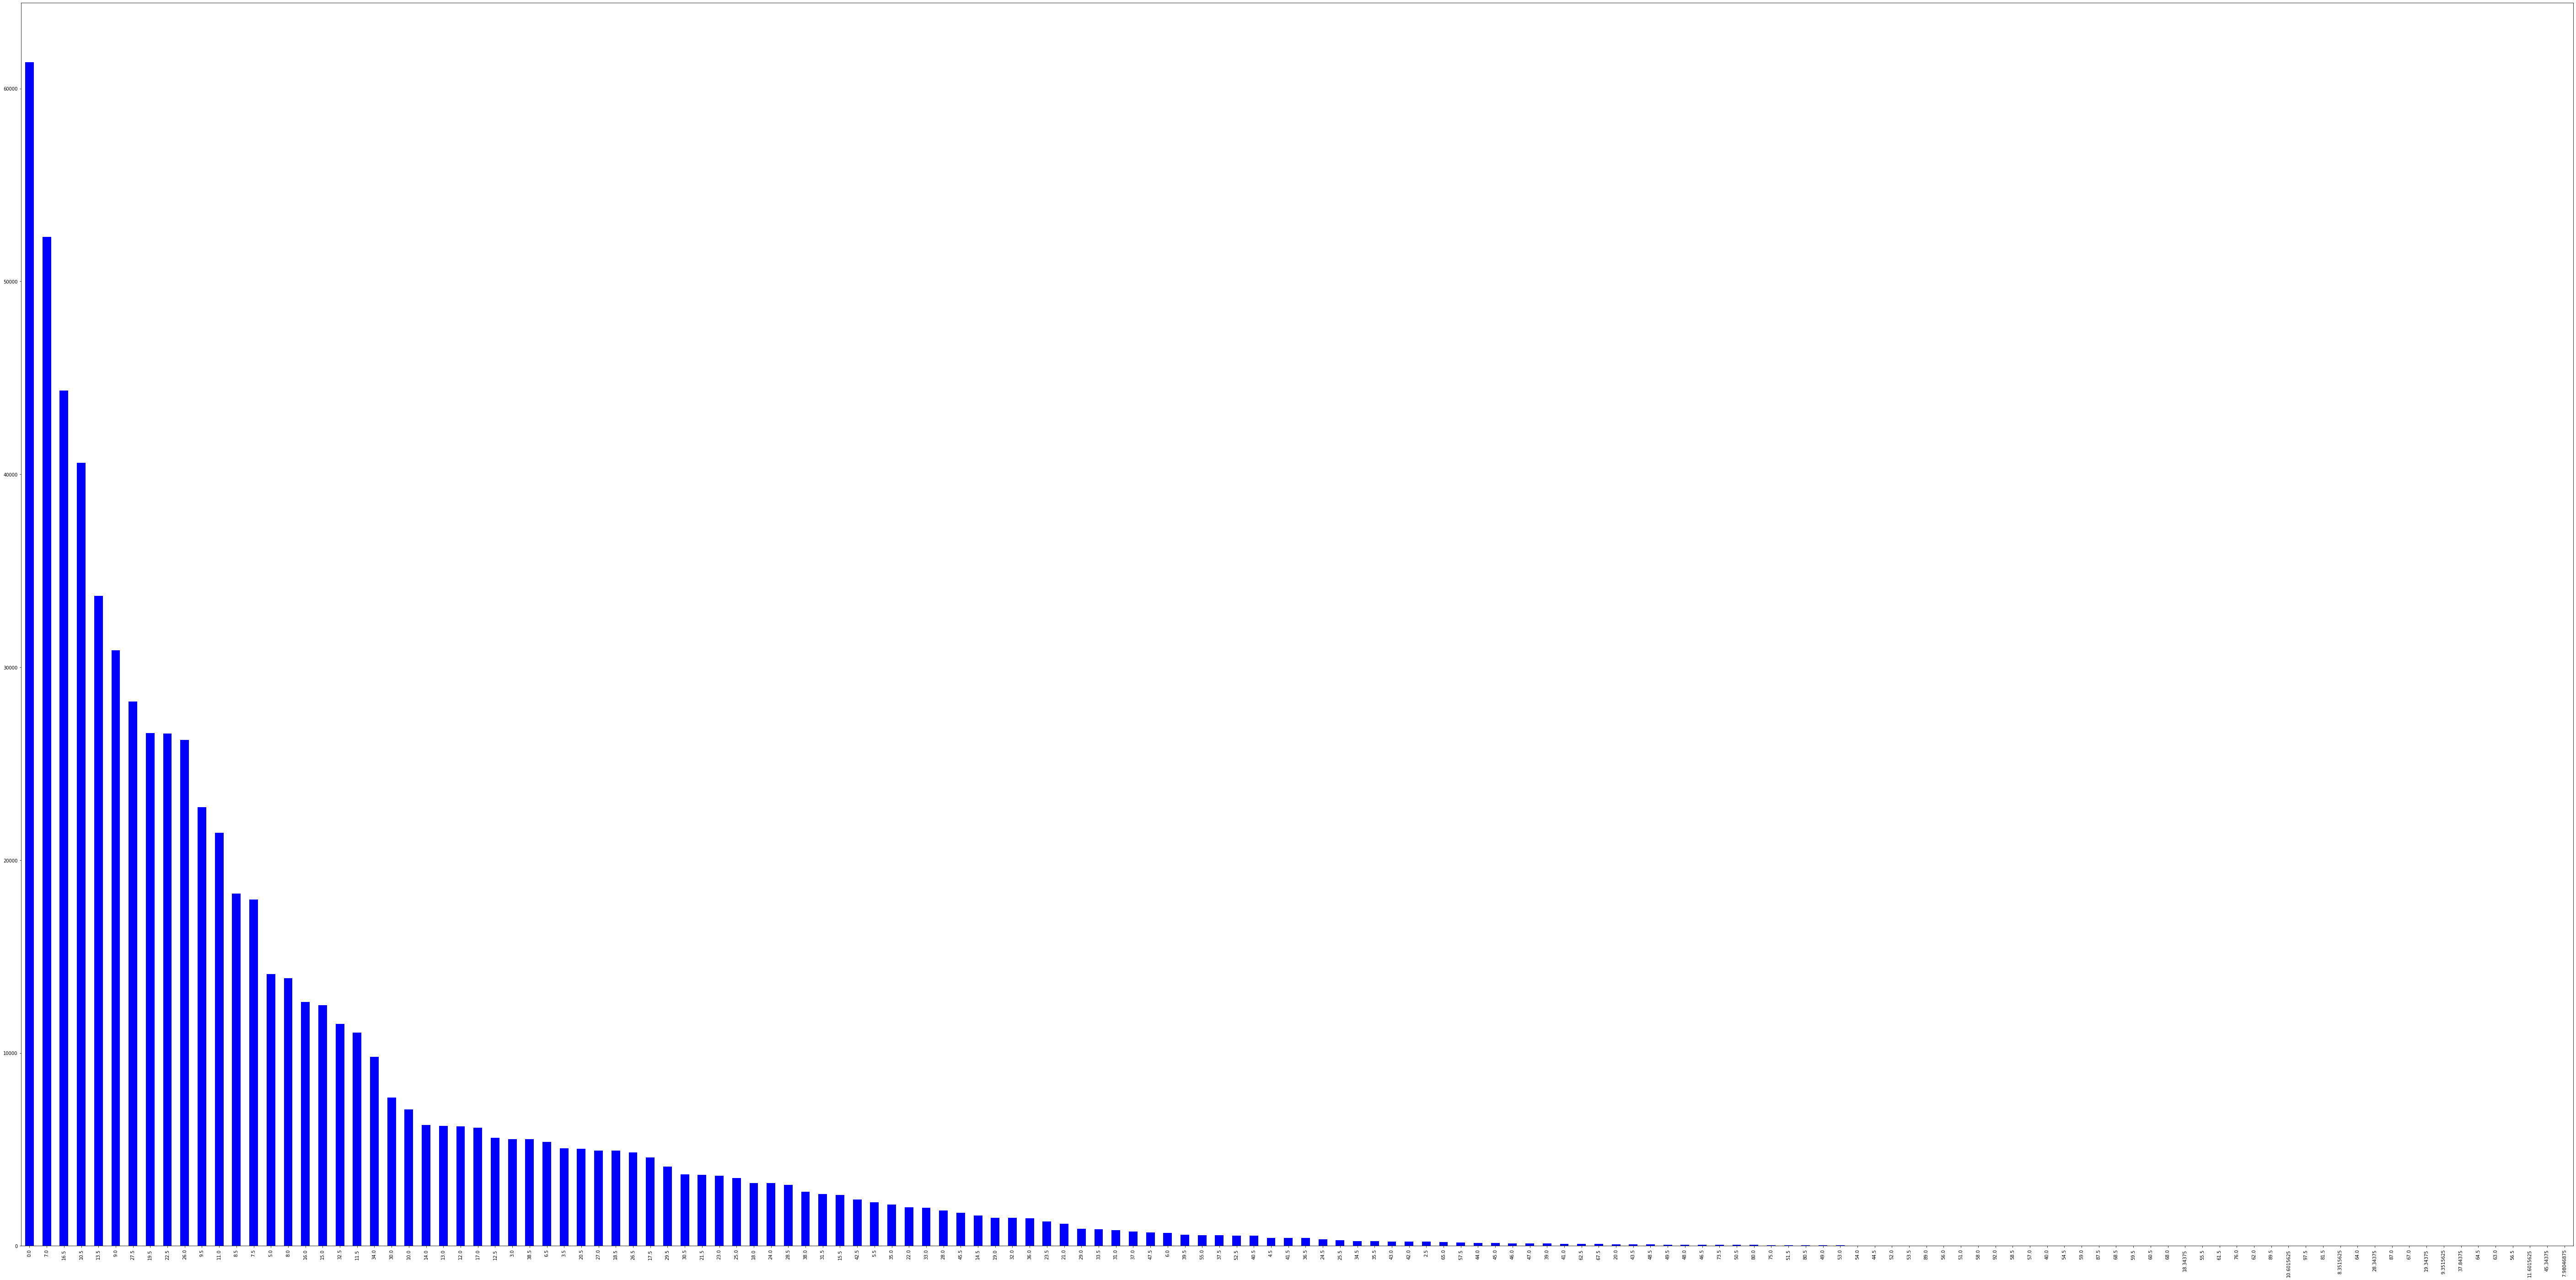

In [63]:
a['price'].value_counts().plot(kind='bar',figsize=(100,50),color='blue')

Finding the Peek Hour

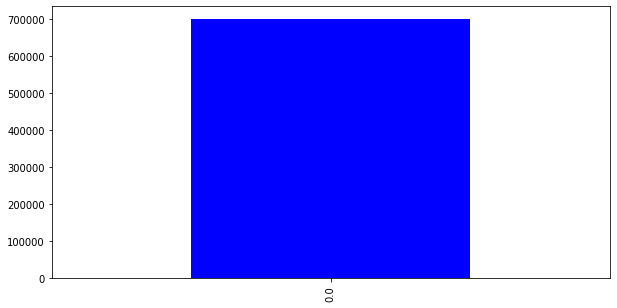

In [64]:
a['hour'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

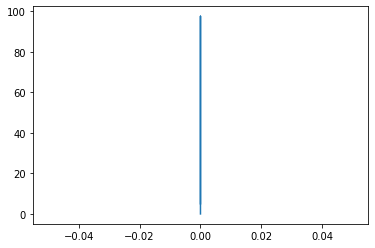

In [65]:
import matplotlib.pyplot as plt
x = a['hour']
y = a['price']
plt.plot(x,y)
plt.show()

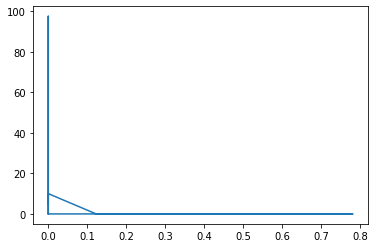

In [66]:
x=a['rain']
y=a['price']
plt.plot(x,y)
plt.show()

In [67]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'date_time', 'day', 'hour'],
      dtype='object')

In [68]:
x1 = a[['distance', 'temp', 'pressure', 'humidity', 'wind', 'rain', 'day','hour','surge_multiplier','clouds']]
y1 = a['price']

In [69]:
#Using Skicit.learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
#Split the data into training and testing sets
x_train,y_train,x_test,y_test = train_test_split(x1, y1, test_size = 0.25, random_state = 42)

In [71]:
linear = LinearRegression()
linear.fit(x_train,x_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
predictions = linear.predict(y_train)

In [73]:
predictions

array([32.5466483 , 14.75715258, 16.81491085, ..., 11.82956896,
       11.85442111, 13.22874517])

In [74]:
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : predictions})
df

,Actual,Predicted
81607,42.5,32.546648
354,0.0,14.757153
471801,32.5,16.814911
407645,27.5,10.480097
474760,27.5,10.556517
...,...,...
538489,7.5,10.708737
579511,13.5,15.517628
5421,9.0,11.829569
279982,8.0,11.854421


Visualization

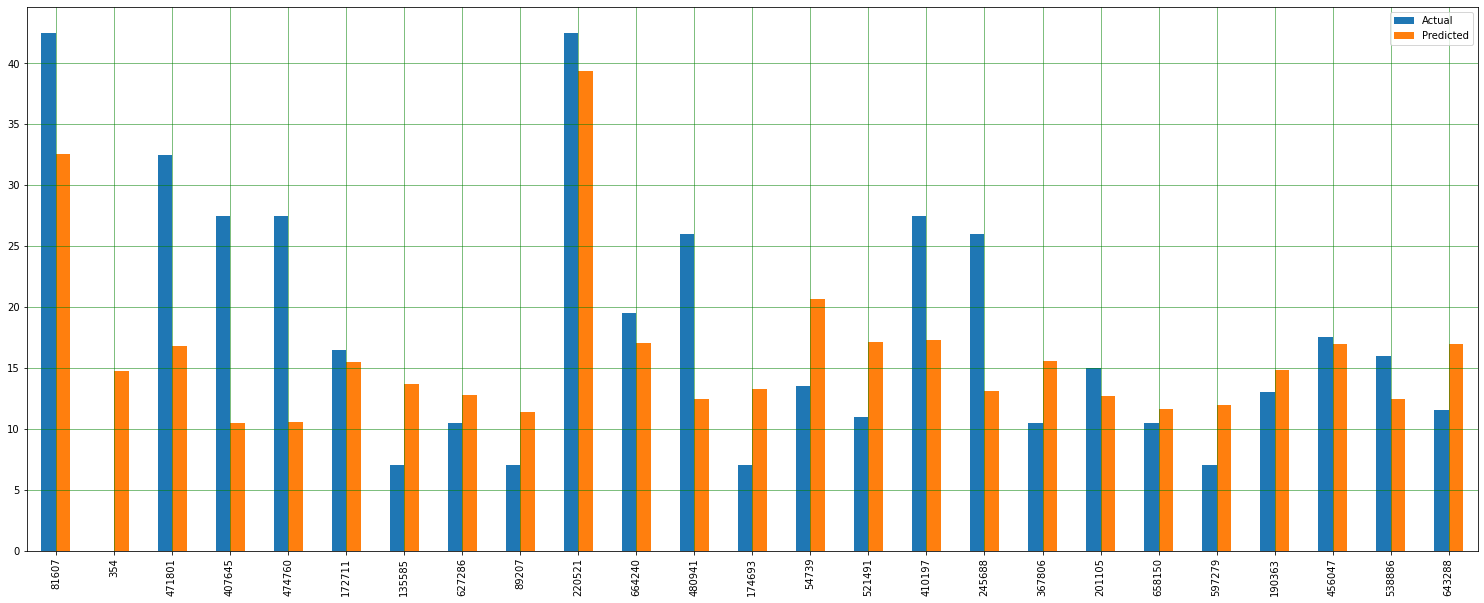

In [76]:
df1 = df.head(25)
df1.plot(kind = 'bar', figsize = (26,10))
plt.grid(which = 'major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which = 'minor', linestyle=':', linewidth='0.5', color='black')
plt.show()